In [1]:
!pip install mplfinance

You should consider upgrading via the 'c:\users\saidj\onedrive\documentos\projects\forex_ml_bot\forex_ml_bot\mtvenv\scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
from IPython.display import clear_output

from sklearn.metrics import confusion_matrix, auc, roc_curve
import itertools
import yaml
import os
import numpy as np
from statistics import mean
from datetime import datetime, timedelta
import time
from sklearn.metrics import precision_recall_curve, auc
import os
import sys
pd.options.display.max_rows = 999
pd.set_option('display.float_format', '{:.4f}'.format)


In [3]:
root_dir = os.path.abspath(os.path.join(os.path.dirname('see_all_expewriments.ipynb'), '..'))
os.chdir(root_dir)
sys.path.insert(0, os.path.join(root_dir, 'src'))

In [4]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title='Matriz de Confusión',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y plotea la matriz de confusión.
    La normalización se puede aplicar configurando `normalize=True`.
    """
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(6, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')
    plt.tight_layout()

In [5]:
with open('configs/project_config.yml', 'r') as archivo:
    config = yaml.safe_load(archivo)

initial_wallet_value = config['start_money']


In [6]:
# root_path = 'C:/Users/SaidJ/OneDrive/Documentos/projects/forex_ml_bot/experiments 20240623'

# iteration = '1'
# path = 'Mode_train-Model_gradient_boosting-TrainWw_5760-TrainPd_24-TradStgy_ml_strategy-PerFwTg_8-SL_10-RR_2-CloseTime_True-TS_False'


# iteration = '2'
# path = 'Mode_train-Model_random_forest-TrainWw_1920-TrainPd_24-TradStgy_ml_strategy-PerFwTg_8-SL_10-RR_4-CloseTime_True-TS_False'


# iteration = '3'
# root_path = f'./backbone/data/backtest/experiments/{iteration}'

root_path = f'./backbone/data/backtest/experiments/'
path = 'Mode_train-Model_gradient_boosting-TrainWw_11520-TrainPd_24-TradStgy_bband_sell_stgy-PerFwTg_12-SL_15-RR_3-CloseTime_True-TS_False'



orders = pd.read_csv(os.path.join(root_path, path, 'orders.csv'))
wallet = pd.read_csv(os.path.join(root_path, path, 'wallet.csv'))


In [7]:
orders.head(50)

,id,ticker,operation_type,open_time,close_time,open_price,last_price,close_price,profit,stop_loss,take_profit,units,profit_in_pips,comment
0,801fb81f-452b-11ef-b1dd-f7a510197866,USDCAD,OperationType.SELL,2023-01-04 00:00:00,2023-01-04 01:00:00,1.3661,1.3661,1.3676,-9.8672,1.3676,1.3616,6667,-0.0015,ClosePositionType.STOP_LOSS
1,87a51c89-452b-11ef-9f86-f7a510197866,USDJPY,OperationType.SELL,2023-01-05 01:00:00,2023-01-05 03:00:00,132.2480,132.2480,131.7980,29.7000,132.3980,131.7980,66,0.4500,ClosePositionType.TAKE_PROFIT
2,881c5177-452b-11ef-a3c6-f7a510197866,USDJPY,OperationType.SELL,2023-01-05 19:00:00,2023-01-05 23:00:00,133.2460,133.2460,133.3960,-10.2000,133.3960,132.7960,68,-0.1500,ClosePositionType.STOP_LOSS
3,987030e4-452b-11ef-b05c-f7a510197866,USDCHF,OperationType.SELL,2023-01-12 01:00:00,2023-01-12 08:00:00,0.9310,0.9310,0.9325,-10.2984,0.9325,0.9265,6731,-0.0015,ClosePositionType.STOP_LOSS
4,a8d96b6f-452b-11ef-9aba-f7a510197866,USDJPY,OperationType.SELL,2023-01-18 10:00:00,2023-01-18 11:00:00,129.6640,129.6640,129.8140,-10.0500,129.8140,129.2140,67,-0.1500,ClosePositionType.STOP_LOSS
5,a91666ee-452b-11ef-9291-f7a510197866,AUDUSD,OperationType.SELL,2023-01-18 18:00:00,2023-01-18 21:00:00,0.6987,0.6987,0.6942,29.6775,0.7002,0.6942,6595,0.0045,ClosePositionType.TAKE_PROFIT
6,a92039d9-452b-11ef-ba6e-f7a510197866,GBPUSD,OperationType.SELL,2023-01-18 19:00:00,2023-01-19 07:00:00,1.2346,1.2346,1.2331,9.6287,1.2361,1.2300,6595,0.0015,ClosePositionType.DAYS
7,b143fba5-452b-11ef-a9b4-f7a510197866,USDJPY,OperationType.SELL,2023-01-20 19:00:00,2023-01-23 00:00:00,129.7360,129.7360,129.5850,10.4190,129.8860,129.2860,69,0.1510,ClosePositionType.DAYS
8,c0ae7d18-452b-11ef-ac5d-f7a510197866,USDCHF,OperationType.SELL,2023-01-24 18:00:00,2023-01-25 06:00:00,0.9231,0.9231,0.9227,3.0479,0.9246,0.9186,6927,0.0004,ClosePositionType.DAYS
9,d291958f-452b-11ef-b088-f7a510197866,AUDUSD,OperationType.SELL,2023-02-02 06:00:00,2023-02-02 16:00:00,0.7149,0.7149,0.7104,31.4699,0.7164,0.7104,6947,0.0045,ClosePositionType.TAKE_PROFIT


In [8]:
orders = orders.sort_values(by='close_time')

# Cantidad de compras y ventas

[]

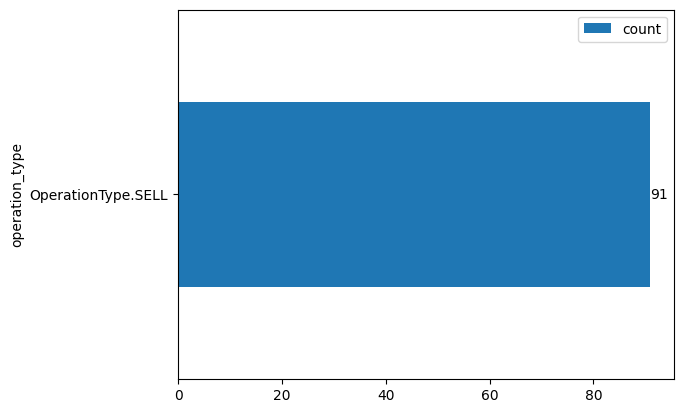

In [9]:
ax = pd.DataFrame(orders.operation_type.value_counts()).plot.barh()
ax.bar_label(ax.containers[0])
ax.plot()

# Compras que salieron bien

In [10]:
try:
    # Calcular el número de operaciones exitosas y fallidas
    successful_buys = orders[(orders['operation_type'] == 'OperationType.BUY') & (orders['profit'] >= 0)].shape[0]
    failed_buys = orders[(orders['operation_type'] == 'OperationType.BUY') & (orders['profit'] < 0)].shape[0]
    
    # Calcular los porcentajes
    total_buys = successful_buys + failed_buys
    percent_successful = (successful_buys / total_buys) * 100
    percent_failed = (failed_buys / total_buys) * 100
    
    # Crear un gráfico de torta
    labels = 'Successful', 'Failed'
    sizes = [percent_successful, percent_failed]
    explode = (0.1, 0)  # Explode the first slice (i.e., 'Successful')
    
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.title('Percentage of Successful and Failed BUY Orders')
    plt.show()
except:
    print('no hay compras')

no hay compras


# Ventas que salieron bien

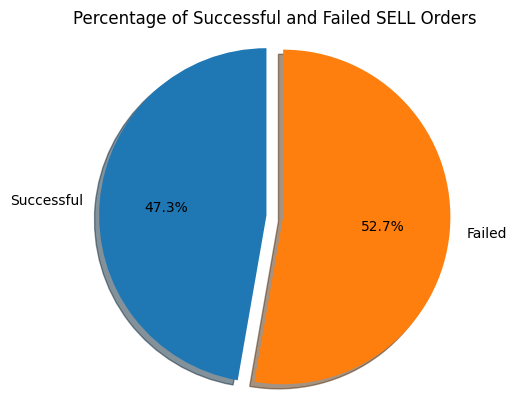

In [11]:
# Calcular el número de operaciones exitosas y fallidas
successful_buys = orders[(orders['operation_type'] == 'OperationType.SELL') & (orders['profit'] >= 0)].shape[0]
failed_buys = orders[(orders['operation_type'] == 'OperationType.SELL') & (orders['profit'] < 0)].shape[0]

# Calcular los porcentajes
total_buys = successful_buys + failed_buys
percent_successful = (successful_buys / total_buys) * 100
percent_failed = (failed_buys / total_buys) * 100

# Crear un gráfico de torta
labels = 'Successful', 'Failed'
sizes = [percent_successful, percent_failed]
explode = (0.1, 0)  # Explode the first slice (i.e., 'Successful')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Percentage of Successful and Failed SELL Orders')
plt.show()

# Cierres por SL y TP

[]

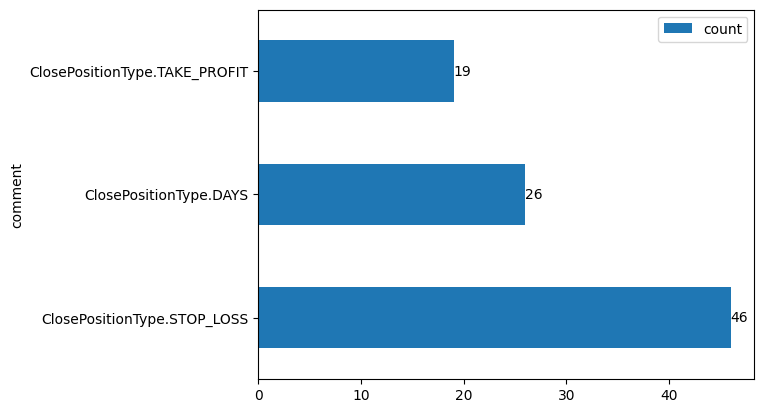

In [12]:
ax = pd.DataFrame(orders.comment.value_counts()).plot.barh()
ax.bar_label(ax.containers[0])
ax.plot()

# Operaciones que cerraron por dias y quedaron positivas

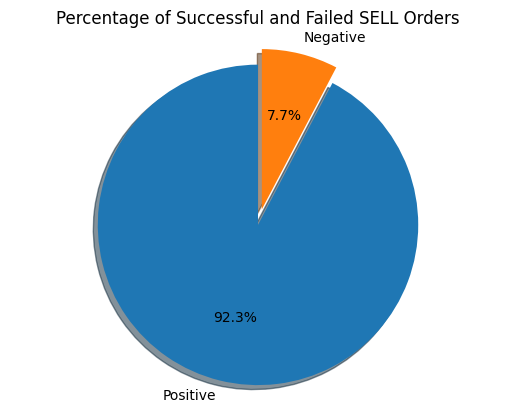

In [13]:
total_days = orders[orders['comment'] == 'ClosePositionType.DAYS']
positive_days = total_days[total_days['profit'] >= 0]
negative_days = total_days[total_days['profit'] < 0]

# Calcula los tamaños
total_count = total_days.shape[0]
positive_count = positive_days.shape[0]
negative_count = negative_days.shape[0]

# Calcula los porcentajes
positive_percentage = (positive_count / total_count) * 100
negative_percentage = (negative_count / total_count) * 100

# Crea los datos para el gráfico de torta
labels = ['Positive', 'Negative']
sizes = [positive_percentage, negative_percentage]

explode = (0.1, 0)  # Explode the first slice (i.e., 'Successful')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Percentage of Successful and Failed SELL Orders')
plt.show()

# Cierres por SL que terminaron positivos

In [14]:
print(orders[(orders['comment']=='ClosePositionType.STOP_LOSS') & (orders['profit']>=0)].shape[0])
orders[(orders['comment']=='ClosePositionType.STOP_LOSS') & (orders['profit']>=0)].shape[0] / orders[(orders['comment']=='ClosePositionType.STOP_LOSS')].shape[0]

0


0.0

# Cierres por SL en que se minimizaron las perdidas

In [15]:
print(orders[(orders['comment']=='ClosePositionType.STOP_LOSS') & (orders['last_price']!=orders['open_price'])].shape[0])
orders[(orders['comment']=='ClosePositionType.STOP_LOSS') & (orders['last_price']!=orders['open_price'])].shape[0] / orders[(orders['comment']=='ClosePositionType.STOP_LOSS')].shape[0]

0


0.0

# Desempenio por ticker

In [16]:
orders_by_ticker = orders.groupby('ticker').agg(
    positivas=('profit', lambda x: (x > 0).sum()),
    negativas=('profit', lambda x: (x < 0).sum()),
    profit=('profit', lambda x: (x).sum()),
).reset_index()

orders_by_ticker['perc'] = (orders_by_ticker['positivas'] / (orders_by_ticker['positivas'] + orders_by_ticker['negativas'])) * 100
orders_by_ticker.sort_values(by='perc', ascending=False)

,ticker,positivas,negativas,profit,perc
4,USDCHF,8,2,129.7284,80.0000
5,USDJPY,11,7,197.0540,61.1111
2,GBPUSD,11,15,89.5604,42.3077
1,EURUSD,5,8,11.9127,38.4615
0,AUDUSD,4,7,15.3496,36.3636
3,USDCAD,4,9,-28.3639,30.7692


# Rendimiento por mes

In [17]:
orders_per_month = orders[['close_time','profit', 'comment']].copy()

orders['close_time'] = pd.to_datetime(orders['close_time'])
orders_per_month['close_time'] = orders['close_time'].dt.to_period('M')


orders_per_month_gb = orders_per_month.groupby(by=['close_time']).agg(
    amount_ops=('profit', 'count'),
    good_ops=('profit', lambda x: (x > 0).sum()),
    bad_ops=('profit', lambda x: (x < 0).sum()),
    take_profit=('comment', lambda x: (x == 'ClosePositionType.TAKE_PROFIT').sum()),
    stop_loss=('comment', lambda x: (x == 'ClosePositionType.STOP_LOSS').sum()),
    profit_sum=('profit', 'sum'),
    max_profit=('profit', 'max'),

).reset_index()

orders_per_month_gb = pd.concat([
    pd.DataFrame({'close_time':['2022-12'],'amount_ops':[0], 'profit_sum':[initial_wallet_value]}), 
    orders_per_month_gb
])

orders_per_month_gb['profit_cumsum'] = orders_per_month_gb['profit_sum'].cumsum()

orders_per_month_gb['perc_change'] = ((orders_per_month_gb['profit_cumsum'] - orders_per_month_gb['profit_cumsum'].shift(1)) / orders_per_month_gb['profit_cumsum'].shift(1))

orders_per_month_gb['perc_change'] = orders_per_month_gb['perc_change'].round(3)

orders_per_month_gb['perc_good_ops'] = (orders_per_month_gb['good_ops'] / orders_per_month_gb['amount_ops'])

orders_per_month_gb[[
    'close_time', 
    'amount_ops', 
    'take_profit',
    'stop_loss',
    'good_ops', 
    'bad_ops',
    'perc_good_ops',
    'max_profit', 
    'profit_sum', 
    'profit_cumsum', 
    'perc_change', 
]].round(3)

,close_time,amount_ops,take_profit,stop_loss,good_ops,bad_ops,perc_good_ops,max_profit,profit_sum,profit_cumsum,perc_change
0,2022-12,0,NaN,NaN,NaN,NaN,NaN,NaN,1000.0000,1000.0000,NaN
0,2023-01,9,2.0000,4.0000,5.0000,4.0000,0.5560,29.7000,42.0580,1042.0570,0.0420
1,2023-02,3,2.0000,0.0000,3.0000,0.0000,1.0000,32.7520,79.9670,1122.0240,0.0770
2,2023-03,6,3.0000,3.0000,3.0000,3.0000,0.5000,34.9320,68.1540,1190.1780,0.0610
3,2023-04,6,1.0000,4.0000,2.0000,4.0000,0.3330,35.6280,-6.0340,1184.1440,-0.0050
4,2023-05,10,0.0000,4.0000,6.0000,4.0000,0.6000,27.3130,11.4190,1195.5630,0.0100
5,2023-06,11,2.0000,7.0000,4.0000,7.0000,0.3640,35.6360,1.7390,1197.3020,0.0010
6,2023-07,6,1.0000,3.0000,2.0000,4.0000,0.3330,35.9190,-1.0210,1196.2810,-0.0010
7,2023-08,7,1.0000,4.0000,3.0000,4.0000,0.4290,35.5500,29.4640,1225.7450,0.0250
8,2023-09,5,1.0000,2.0000,3.0000,2.0000,0.6000,36.9000,46.1270,1271.8720,0.0380


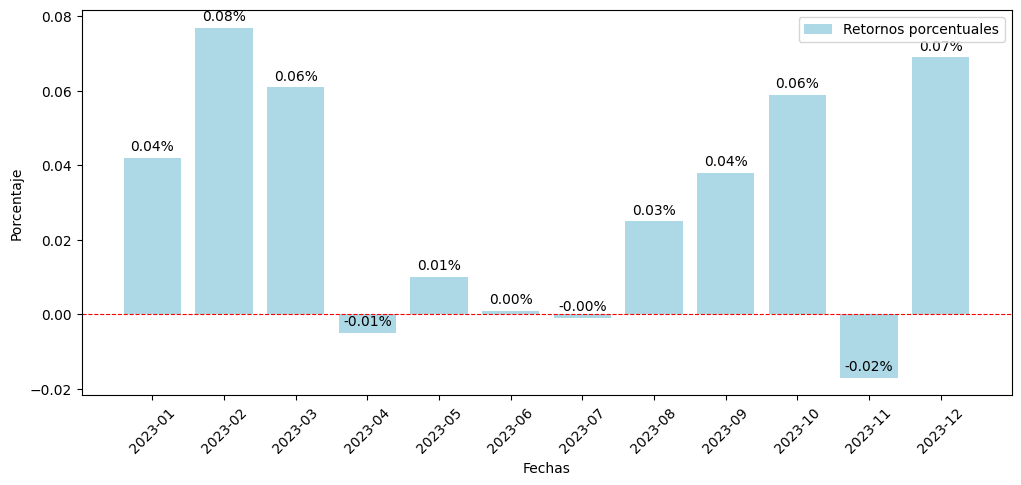

In [18]:
import matplotlib.pyplot as plt

# Datos de ejemplo
grow_perc = orders_per_month_gb[['close_time', 'perc_change']]
fig, ax = plt.subplots(figsize=(12, 5))

x = grow_perc['close_time'].astype(str)
y = grow_perc['perc_change']

# Crear barras
bars = ax.bar(x, y, label='Retornos porcentuales', color='lightblue')

# Agregar etiquetas sobre las barras
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 puntos de desplazamiento vertical
                textcoords="offset points",
                ha='center', va='bottom')

# Agregar una línea de puntos horizontal en el valor 0
ax.axhline(0, color='red', linewidth=0.8, linestyle='--')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Porcentaje')
ax.legend()

plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


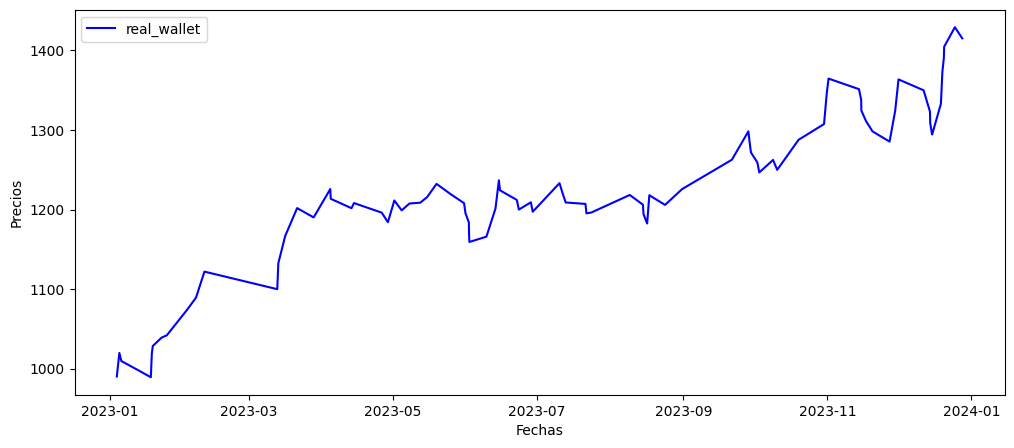

In [19]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(12, 5))

# Datos de ejemplo
x_wallet = pd.to_datetime(wallet['date'])
y_wallet = wallet['wallet']  # Datos para la línea
# Crear una figura y ejes
# Agregar la línea
ax.plot(x_wallet, y_wallet, label='real_wallet', color='blue')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [20]:
wallet.tail(1)

,date,wallet
86,2023-12-28 03:00:00,1415.2412


In [21]:
orders_per_month_gb.perc_change.mean()

0.02991666666666667

In [22]:
orders_per_month_gb.perc_change.std()

0.03219389646651939

In [23]:
change_percent = orders_per_month_gb.perc_change.reset_index().copy().drop(columns='index')
change_percent.fillna(0, inplace=True)

# Inicializar el valor de partida
initial_value = 3000

# Crear una columna para la suma acumulada
change_percent['cumulative_sum'] = initial_value

# Calcular la suma acumulada basada en los porcentajes
for i in range(1, len(change_percent)):
    change_percent.loc[i, 'cumulative_sum'] = change_percent.loc[i-1, 'cumulative_sum'] * (1 + change_percent.loc[i, 'perc_change'])

change_percent

,perc_change,cumulative_sum
0,0.0000,3000.0000
1,0.0420,3126.0000
2,0.0770,3366.7020
3,0.0610,3572.0708
4,-0.0050,3554.2105
5,0.0100,3589.7526
6,0.0010,3593.3423
7,-0.0010,3589.7490
8,0.0250,3679.4927
9,0.0380,3819.3134


# Rendimiento por dia

In [24]:
# orders_per_month_gb = orders_per_month.groupby(by=['year','month', 'day']).agg(
#     amount_ops=('profit', 'count'),
#     good_ops=('profit', lambda x: (x > 0).sum()),
#     bad_ops=('profit', lambda x: (x < 0).sum()),
#     take_profit=('comment', lambda x: (x == 'ClosePositionType.TAKE_PROFIT').sum()),
#     stop_loss=('comment', lambda x: (x == 'ClosePositionType.STOP_LOSS').sum()),
#     profit_sum=('profit', 'sum'),
#     max_profit=('profit', 'max'),

# ).reset_index()

# orders_per_month_gb = pd.concat([
#     pd.DataFrame({'year':[2023], 'month':[0], 'day':[0], 'amount_ops':[0], 'profit_sum':[initial_wallet_value]}), 
#     orders_per_month_gb
# ])

# orders_per_month_gb['profit_cumsum'] = orders_per_month_gb['profit_sum'].cumsum()

# orders_per_month_gb['perc_change'] = ((orders_per_month_gb['profit_cumsum'] - orders_per_month_gb['profit_cumsum'].shift(1)) / orders_per_month_gb['profit_cumsum'])

# orders_per_month_gb['perc_change'] = orders_per_month_gb['perc_change'].round(3)

# orders_per_month_gb['perc_good_ops'] = (orders_per_month_gb['good_ops'] / orders_per_month_gb['amount_ops']) * 100

# orders_per_month_gb = orders_per_month_gb[[
#     'year', 
#     'month', 
#     'amount_ops', 
#     'take_profit',
#     'stop_loss',
#     'good_ops', 
#     'bad_ops',
#     'perc_good_ops',
#     'max_profit', 
#     'profit_sum', 
#     'profit_cumsum', 
#     'perc_change', 
# ]].round(3)

# orders_per_month_gb[orders_per_month_gb['month']==1]

In [25]:
# ticker = 'XAUUSD'
# date_from = datetime(2023,1,1)
# date_to = date_from + timedelta(days=5)

# while date_to < datetime(2024,1,1):
#     date_from_str = date_from.strftime('%Y-%m-%d')
#     date_to_str = date_to.strftime('%Y-%m-%d')

#     historical_prices = pd.read_csv(f'./backbone/data/backtest/symbols/{ticker}.csv')
    
#     historical_prices = historical_prices[
#         (historical_prices['Date']>date_from_str)
#         & (historical_prices['Date']<date_to_str)
#     ]
    
#     plt.figure(figsize=(14, 7))
#     plt.plot(historical_prices['Date'], historical_prices['Close'], label=f'{ticker} Price', color='blue')
#     plt.plot(historical_prices['Date'], historical_prices['High'], label=f'{ticker} Price', color='black')
#     plt.plot(historical_prices['Date'], historical_prices['Low'], label=f'{ticker} Price', color='gray')
    
#     # Añadir las operaciones de compra y venta
#     buy_trades = orders[
#         (orders['operation_type']=='OperationType.BUY') 
#         & (orders['close_time']>date_from_str)
#         & (orders['close_time']<date_to_str)
#         & (orders['ticker']==ticker)
#     ]
#     sell_trades = orders[
#         (orders['operation_type']=='OperationType.SELL') 
#         & (orders['close_time']>date_from_str)
#         & (orders['close_time']<date_to_str)
#         & (orders['ticker']==ticker)
#     ]
    
#     # Graficar las operaciones de compra
#     plt.scatter(buy_trades['open_time'], buy_trades['open_price'], color='green', marker='^', s=100, label='Buy Open')
#     plt.scatter(buy_trades['close_time'], buy_trades['close_price'], color='lime', marker='o', s=100, label='Buy Close')
    
#     # Graficar las operaciones de venta
#     plt.scatter(sell_trades['open_time'], sell_trades['open_price'], color='red', marker='v', s=100, label='Sell Open')
#     plt.scatter(sell_trades['close_time'], sell_trades['close_price'], color='orange', marker='o', s=100, label='Sell Close')
    
#     # Añadir etiquetas y leyenda
#     plt.xlabel('Date')
#     plt.ylabel('Price')
#     plt.title(f'{ticker} Price with Buy/Sell Trades')
#     plt.legend()
    
#     # Mostrar el gráfico
#     plt.show()
    
#     print(date_from_str, date_to_str)
   
#     a = input()
    
#     clear_output(wait=True)

#     date_from += timedelta(days=5)
#     date_to = date_from + timedelta(days=5)


In [26]:
import mplfinance as mpf
import matplotlib.pyplot as plt

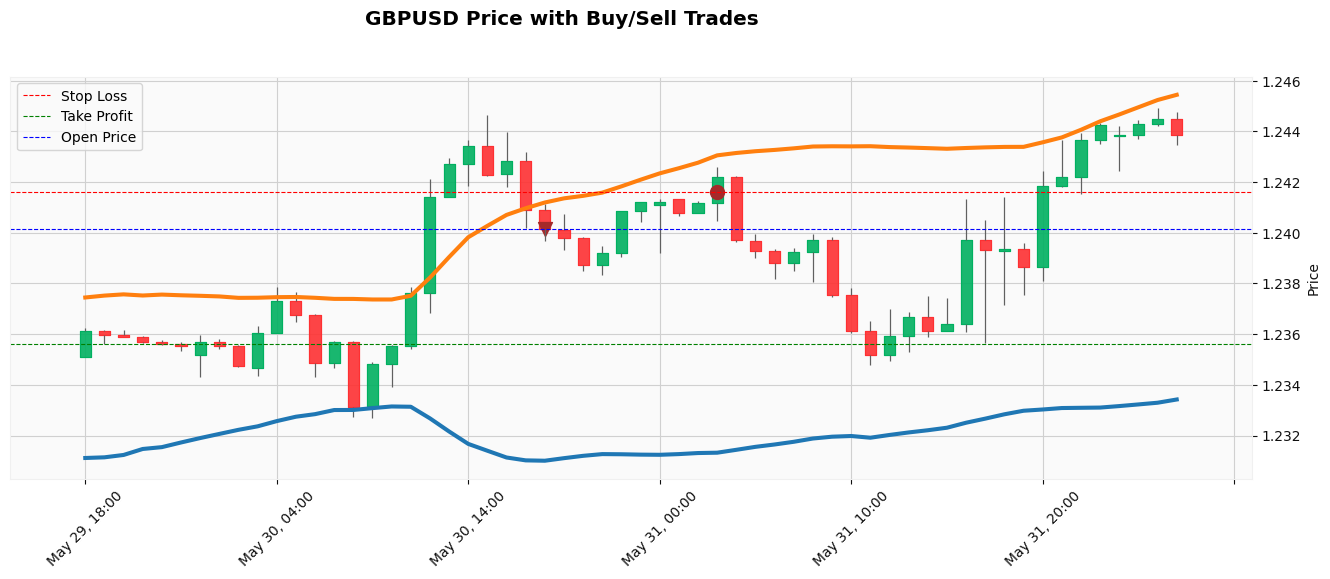

2023-05-29 18:00:00 2023-06-01 03:00:00


In [ ]:
import pandas as pd
import numpy as np
import mplfinance as mpf
import matplotlib.pyplot as plt
from datetime import timedelta

ticker = 'USDJPY'

for ticker in ['EURUSD', 'GBPUSD', 'USDJPY', 'USDCAD', 'AUDUSD', 'USDCHF']:
    # Cargar los datos de precios históricos
    prices = pd.read_csv(f'./backbone/data/backtest/symbols/{ticker}.csv')
    
    # Convertir las columnas de fechas a formato datetime
    prices['Date'] = pd.to_datetime(prices['Date'])
    orders['close_time'] = pd.to_datetime(orders['close_time'])
    orders['open_time'] = pd.to_datetime(orders['open_time'])
    
    for index, order in orders[orders.ticker == ticker].iterrows():
        date_from = order.open_time - timedelta(hours=24)
        date_to = order.close_time + timedelta(hours=24)
        
        # Filtrar los precios históricos para el rango de fechas relevante
        historical_prices = prices[
            (prices['Date'] >= date_from) &
            (prices['Date'] <= date_to)
        ].copy()
    
        historical_prices.set_index('Date', inplace=True)
    
        # Crear las listas de anotaciones inicializadas con NaN
        open_annotations = [np.nan] * len(historical_prices)
        close_annotations = [np.nan] * len(historical_prices)
    
        # Buscar las posiciones correspondientes a las fechas de las operaciones
        if order.open_time in historical_prices.index:
            open_annotations[historical_prices.index.get_loc(order.open_time)] = order.open_price
        if order.close_time in historical_prices.index:
            close_annotations[historical_prices.index.get_loc(order.close_time)] = order.close_price
    
        if order.operation_type == 'OperationType.BUY':
            color_open = 'green'
            color_close = 'lime'
            marker_open = '^'  # Flecha hacia arriba
            marker_close = 'o'  # Círculo
        else:
            color_open = 'brown'
            color_close = 'brown'
            marker_open = 'v'  # Flecha hacia abajo
            marker_close = 'o'  # Círculo
    
        # Crear los addplot
        opens = mpf.make_addplot(open_annotations, type='scatter', markersize=100, marker=marker_open, color=color_open)
        closes = mpf.make_addplot(close_annotations, type='scatter', markersize=100, marker=marker_close, color=color_close)
        lower_bband = mpf.make_addplot(historical_prices['lower_bband'])
        upper_bband = mpf.make_addplot(historical_prices['upper_bband'])
    
        # Crear el gráfico de velas japonesas con mplfinance
        fig, axlist = mpf.plot(
            historical_prices, 
            type='candle', 
            style='yahoo', 
            returnfig=True, 
            volume=False, 
            title=f'{ticker} Price with Buy/Sell Trades', 
            figratio=(15,5),
            addplot=[opens, closes, lower_bband, upper_bband]
        )
    
        # Agregar las operaciones al gráfico
        ax = axlist[0]  # Acceder al primer subplot, que contiene el gráfico de velas
        # Agregar líneas horizontales para stop loss, take profit y precio de apertura
        ax.axhline(order.stop_loss, color='red', linewidth=0.8, linestyle='--', label='Stop Loss')
        ax.axhline(order.take_profit, color='green', linewidth=0.8, linestyle='--', label='Take Profit')
        ax.axhline(order.open_price, color='blue', linewidth=0.8, linestyle='--', label='Open Price')
    
        # Añadir etiquetas y leyenda
        handles, labels = ax.get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        ax.legend(by_label.values(), by_label.keys())
        
        plt.xticks(rotation=45)
    
        plt.show()
        
        print(date_from, date_to)
        
        a = input()  # Pausa para la interacción del usuario
        clear_output()
        
        plt.close(fig)  # Cerrar la figura para la siguiente iteración


In [ ]:
orders_per_month = orders[['close_time','comment', 'ticker', 'profit']].copy()
orders_per_month['close_time'] = pd.to_datetime(orders_per_month['close_time'])
orders_per_month['year'] = orders_per_month['close_time'].dt.year
orders_per_month['month'] = orders_per_month['close_time'].dt.month
orders_per_month['day'] = orders_per_month['close_time'].dt.day

orders_per_month_gb = orders_per_month.groupby(by=['year','month', 'day']).agg(
    take_profit=('comment', lambda x: (x == 'ClosePositionType.TAKE_PROFIT').sum()),
    stop_loss=('comment', lambda x: (x == 'ClosePositionType.STOP_LOSS').sum()),
    profit=('profit', lambda x: (x).sum()),

)

orders_per_month_gb['tp_cumsum'] = orders_per_month_gb.groupby(by=['year','month'])['take_profit'].cumsum()
orders_per_month_gb['sl_cumsum'] = orders_per_month_gb.groupby(by=['year','month'])['stop_loss'].cumsum()
orders_per_month_gb['profit_cumsum'] = orders_per_month_gb.groupby(by=['year','month'])['profit'].cumsum()
orders_per_month_gb

# Que hubiera pasado si no se operaba con algunos tickers?

In [ ]:
tickers_permitidos = orders_by_ticker[orders_by_ticker['profit']>0].ticker.unique()
print(tickers_permitidos)

# tickers_permitidos = [
#     'EURUSD', 
#     'GBPUSD', 
#     'USDJPY', 
#     # 'USDCAD', 
#     'AUDUSD', 
#     'USDCHF'
# ]

orders_min = orders[orders['ticker'].isin(tickers_permitidos)].copy().reset_index()

# Rendimiento por mes

In [ ]:
orders_min['close_month'] = pd.to_datetime(orders_min['close_time'])
orders_min['close_month'] = orders_min['close_month'].dt.to_period('M')

orders_per_month_gb = orders_min.groupby(by=['close_month']).agg(
    amount_ops=('profit', 'count'),
    good_ops=('profit', lambda x: (x > 0).sum()),
    bad_ops=('profit', lambda x: (x < 0).sum()),
    take_profit=('comment', lambda x: (x == 'ClosePositionType.TAKE_PROFIT').sum()),
    stop_loss=('comment', lambda x: (x == 'ClosePositionType.STOP_LOSS').sum()),
    profit_sum=('profit', 'sum'),
    max_profit=('profit', 'max'),

).reset_index()

orders_per_month_gb = pd.concat([
    pd.DataFrame({'close_time':['2022-12'],'amount_ops':[0], 'profit_sum':[initial_wallet_value]}), 
    orders_per_month_gb
])

orders_per_month_gb['profit_cumsum'] = orders_per_month_gb['profit_sum'].cumsum()

orders_per_month_gb['perc_change'] = ((orders_per_month_gb['profit_cumsum'] - orders_per_month_gb['profit_cumsum'].shift(1)) / orders_per_month_gb['profit_cumsum'])

orders_per_month_gb['perc_change'] = orders_per_month_gb['perc_change'].round(3)

orders_per_month_gb['perc_good_ops'] = (orders_per_month_gb['good_ops'] / orders_per_month_gb['amount_ops']) * 100

orders_per_month_gb = orders_per_month_gb[[
    'close_month', 
    'amount_ops', 
    'take_profit',
    'stop_loss',
    'good_ops', 
    'bad_ops',
    'perc_good_ops',
    'max_profit', 
    'profit_sum', 
    'profit_cumsum', 
    'perc_change', 
]].round(3)

orders_per_month_gb

In [ ]:
orders_min['wallet'] = orders_min['profit']
orders_min.loc[0, 'wallet'] = initial_wallet_value + orders_min.iloc[0]['profit']
orders_min['wallet'] = orders_min['wallet'].cumsum()

In [ ]:
orders_by_ticker = orders_min.groupby('ticker').agg(
    positivas=('profit', lambda x: (x > 0).sum()),
    negativas=('profit', lambda x: (x < 0).sum()),
    profit=('profit', lambda x: (x).sum()),
).reset_index()

orders_by_ticker['perc'] = orders_by_ticker['positivas'] / (orders_by_ticker['positivas'] + orders_by_ticker['negativas'])
orders_by_ticker.sort_values(by='perc', ascending=False)

In [ ]:
orders_min[(orders_min['comment']=='ClosePositionType.STOP_LOSS') & (orders_min['profit']>=0)].shape[0] / orders_min[(orders_min['comment']=='ClosePositionType.STOP_LOSS')].shape[0]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Datos de ejemplo
x_wallet = pd.to_datetime(orders_min['close_time'])
y_wallet = orders_min['wallet']  # Datos para la línea
# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))
# Agregar la línea
ax.plot(x_wallet, y_wallet, label='simulated_wallet', color='red')



# Datos de ejemplo
x_wallet = pd.to_datetime(wallet['date'])
y_wallet = wallet['wallet']  # Datos para la línea
# Crear una figura y ejes
# Agregar la línea
ax.plot(x_wallet, y_wallet, label='real_wallet', color='blue')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
true_values = pd.read_csv(os.path.join(root_path, path, 'trainres.csv'))
predictions = pd.read_csv(os.path.join(root_path, path, 'test_res.csv')).dropna()

In [ ]:
predictions

In [ ]:
from sklearn.metrics import f1_score, make_scorer, precision_score, recall_score, classification_report

precision = precision_score(predictions.y_true, predictions.y_pred, average='weighted')
recall = recall_score(predictions.y_true, predictions.y_pred, average='weighted')
f1 = f1_score(predictions.y_true, predictions.y_pred, average='weighted')

print(precision)
print(recall)
print(f1)

In [ ]:
fpr_rf, tpr_rf, _ = roc_curve(predictions['y_true'], predictions['y_pred'])
print(classification_report(predictions['y_true'], predictions['y_pred']))

print("Confusion Matrix")
print(confusion_matrix(predictions['y_true'], predictions['y_pred']))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
predictions['binary_pred'] = np.where(
    (predictions['y_pred']==0), 
    1 - predictions['proba'], 
    predictions['proba']
)

predictions

In [ ]:
predictions.binary_pred.hist()

In [ ]:
precision, recall, thresholds = precision_recall_curve(predictions['y_true'], predictions['binary_pred'])
pr_auc = auc(recall, precision)
# Plotear la curva de precisión/recall
plt.figure(figsize=(20, 10))

plt.plot(recall, precision, marker='.', label=f'Random Forest (AUC = {pr_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_curve

def find_best_threshold_fbeta(y_true, y_proba, beta=0.01):
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
    
    # Calcular F-beta scores
    fbeta_scores = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall)
    
    # Evitar división por cero y resultados nan
    fbeta_scores = np.nan_to_num(fbeta_scores)
    
    # Encontrar el umbral que maximiza el F-beta score
    index = np.argmax(fbeta_scores)
    best_threshold = thresholds[index]
    best_precision = precision[index]
    best_recall = recall[index]
    best_fbeta = np.max(fbeta_scores)
    
    return best_threshold, best_precision, best_recall, best_fbeta



In [ ]:
find_best_threshold_fbeta(predictions['y_true'], predictions['binary_pred'], beta=0.05)

In [ ]:
threshold = 0.45
preds = np.where(
    (predictions['binary_pred']<=threshold),
    0, 
    1
)

print(classification_report(predictions.y_true, preds))

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingClassifier

def get_xgboost_feature_importance_from_stacking(pipeline):
    """
    Obtiene la importancia de las características del XGBClassifier dentro de un StackingClassifier.

    Parameters:
    pipeline (Pipeline): Un objeto pipeline de sklearn entrenado que contiene un StackingClassifier.

    Returns:
    dict: Un diccionario donde las claves son los nombres de las características y los valores son su importancia.
    """
    if not isinstance(pipeline, Pipeline):
        raise ValueError("El parámetro debe ser un objeto de tipo Pipeline de sklearn.")

    # Intentar obtener el último estimador del pipeline
    final_estimator = pipeline.named_steps[list(pipeline.named_steps.keys())[-1]]

    # Comprobar si el estimador final es un StackingClassifier
    if not isinstance(final_estimator, StackingClassifier):
        raise ValueError("El estimador final del pipeline no es un StackingClassifier.")
    
    # Obtener el ProbabilityTransformer del stack
    prob_transf = final_estimator.named_estimators_['prob_transf']
    
    # Obtener el modelo XGBClassifier dentro del ProbabilityTransformer
    xgb_model = prob_transf.model
    
    # Comprobar si el XGBClassifier tiene el atributo feature_importances_
    if not hasattr(xgb_model, 'feature_importances_'):
        raise ValueError("El XGBClassifier no tiene el atributo feature_importances_.")

    importances = xgb_model.feature_importances_

    # Obtener los nombres de las características
    first_transformer = pipeline.named_steps[list(pipeline.named_steps.keys())[0]]
    if hasattr(first_transformer, 'get_feature_names_out'):
        feature_names = first_transformer.get_feature_names_out()
    else:
        feature_names = pipeline['preprocessor'].get_feature_names_out()  # Ajustar según el nombre de tu primer paso

    return dict(zip(feature_names, importances))

In [ ]:
pipeline_path = os.path.join(root_path, path, 'pipe.pkl')

In [ ]:
import joblib

with open(pipeline_path, 'rb') as file:
    pipeline = joblib.load(file)

# features = pipeline.named_steps[list(pipeline.named_steps.keys())[-1]].named_estimators_['prob_transf']
features = get_xgboost_feature_importance_from_stacking(pipeline)

In [ ]:
names = []
values = []

for k, v in features.items():
    names.append(k)
    values.append(v)

features_df = pd.DataFrame({'feature':names, 'importance':values})
features_df.sort_values(by='importance', ascending=False)


In [ ]:


from sklearn.metrics import precision_score, f1_score, recall_score



tickers = config["tickers"] 
tickers

predictions = predictions.sort_values(by='fecha')
true_values = true_values.sort_values(by='fecha')


# renombro las columnas
column_names = {}
for column in predictions.columns:
    if column != 'fecha':
        column_names[column] = f'{column}_preds'

predictions = predictions.rename(columns=column_names)

column_names = {}
for column in true_values.columns:
    if column != 'fecha':
        column_names[column] = f'{column}_true'

true_values = true_values.rename(columns=column_names)
performance = pd.concat(
    [
        predictions,
        true_values
    ], axis=1, join="inner"
)

recall_list = []
f1_list = []
precision_list = []

for ticker in tickers:
    y_true = performance[performance[f'{ticker}_true'].notna()][f'{ticker}_true']
    y_pred = performance[performance[f'{ticker}_preds'].notna()][f'{ticker}_preds']
    
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # print(classification_report(performance[f'{ticker}_true'], performance[f'{ticker}_preds'], target_names=target_names))
    
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    

# Grafico de velas

In [ ]:
# import plotly.graph_objects as go

# fig = go.Figure(data=[go.Candlestick(x=prices['Date'],
#                 open=prices['Open'],
#                 high=prices['High'],
#                 low=prices['Low'],
#                 close=prices['Close'])])

# fig.update_layout(
#     title=f"{config['ticker']}",
#     yaxis_title=f"{config['ticker']} Stock"
# )

# fig.show()

# Estrategia

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
x_prices = pd.to_datetime(prices['Date'])
y_prices = prices['Close']  # Datos para la línea

x_buy = pd.to_datetime(buys['fecha'])
y_buy = buys['buy']  # Datos para el scatter plot

x_sell = pd.to_datetime(sells['date'])
y_sell = sells['sell']  # Datos para el scatter plot

x_wallet = pd.to_datetime(wallet['date'])
y_wallet = wallet['wallet']  # Datos para la línea

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Agregar la línea
ax.plot(x_prices, y_prices, label='market', color='black')

ax.plot(x_wallet, y_wallet, label='wallet', color='purple')

# Agregar el scatter plot
ax.scatter(x_buy, y_buy, label='compras', color='cyan', marker='>')

ax.scatter(x_sell, y_sell, label='Ventas', color='red', marker='o')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
x_prices = pd.to_datetime(prices['Date'])
y_prices = prices['Close']  # Datos para la línea

x_buy = pd.to_datetime(buys['date'])
y_buy = buys['buy']  # Datos para el scatter plot

x_sell = pd.to_datetime(sells['date'])
y_sell = sells['sell']  # Datos para el scatter plot

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Agregar la línea
ax.plot(x_prices, y_prices, label='market', color='black')

# Agregar el scatter plot
ax.scatter(x_buy, y_buy, label='compras', color='cyan', marker='>')

ax.scatter(x_sell, y_sell, label='Ventas', color='red', marker='o')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc

print('Area bajo la curva: ', auc(wallet.index, wallet['wallet']))

# Datos de ejemplo
x_prices = pd.to_datetime(wallet['date'])
y_prices = wallet['wallet']  # Datos para la línea


# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Agregar la línea
ax.plot(x_prices, y_prices, label='Wallet', color='blue')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


# Modelo

In [ ]:
predictions.sort_values(by='fecha')

In [ ]:
true_values.sort_values(by='fecha')

In [ ]:
accuracy_score(predictions[predictions['YPF'].notna()].YPF, true_values[true_values['YPF'].notna()].YPF)

In [ ]:
threshold_down = 0.5
threshold_up = 0.5

df_predictions = performance[(performance['y_pred']<threshold_down) | (performance['y_pred']>threshold_up)].copy()
df_predictions['y_pred'] = np.where(df_predictions['y_pred']<threshold_down, 0, df_predictions['y_pred'])
df_predictions['y_pred'] = np.where(df_predictions['y_pred']>threshold_up, 1, df_predictions['y_pred'])

print(accuracy_score(df_predictions.y_true, df_predictions.y_pred))
plot_confusion_matrix(df_predictions.y_true, df_predictions.y_pred, classes=[0,1], cmap=plt.cm.Reds)

In [ ]:
threshold_down = 0.1
threshold_up = 0.9

df_predictions = performance[(performance['y_pred']<threshold_down) | (performance['y_pred']>threshold_up)].copy()
df_predictions['y_pred'] = np.where(df_predictions['y_pred']<threshold_down, 0, df_predictions['y_pred'])
df_predictions['y_pred'] = np.where(df_predictions['y_pred']>threshold_up, 1, df_predictions['y_pred'])

print(accuracy_score(df_predictions.y_true, df_predictions.y_pred))
plot_confusion_matrix(df_predictions.y_true, df_predictions.y_pred, classes=[0,1], cmap=plt.cm.Reds)

In [ ]:
plt.hist(performance.y_pred, color='lightgreen', ec='black', bins=50)
plt.show()

In [ ]:
buys = buys.rename(columns={''})

In [ ]:
operations = pd.concat([buys[buys['YPF'].notna()], sells[sells['YPF'].notna()]], axis=1, join="inner")[['fecha','YPF']]
operations

In [ ]:
operations['positive'] = np.where(operations['buy']>operations['sell'], 0, 1)
operations['Profit'] = operations['sell'] - operations['buy'] 
operations['positive'].value_counts()